In [12]:
import requests
import json
import re
import networkx as nx
%matplotlib inline
import pandas as pd

In [13]:
drySpells = pd.read_csv ('drySpells.csv')
#drySpells=drySpells.set_index(['Year', 'Month', 'State', 'City'])
frostDays=pd.read_csv('frostDays.csv')
#frostDays=frostDays.set_index(['Year', 'Month', 'State', 'City'])
maxHighTemp=pd.read_csv('maxHighTemp.csv')
#maxHighTemp=maxHighTemp.set_index(['Year', 'Month', 'State','City'])
minLowTemp=pd.read_csv('minLowTemp.csv')
#minLowTemp=minLowTemp.set_index(['Year', 'Month', 'State','City'])
precipitation=pd.read_csv("precipitation.csv")
#precipitation=precipitation.set_index(['Year', 'Month', 'State','City'])

In [14]:
merge1 = drySpells.merge(frostDays)
merge2 = merge1.merge(maxHighTemp)
merge3 = merge2.merge(minLowTemp)
merge4 = merge3.merge(precipitation)

In [57]:
merge4['Year'] = merge4['Year'].astype(str)
merge4['Full_Name'] = merge4['City'] + ' ' + merge4['State'] + ' ' + merge4['Month'] + ' ' + merge4['Year']
df = merge4.drop(['Year', 'Month', 'State', 'City'], axis=1)
df = df.set_index('Full_Name')
df = df.dropna(axis=0)


In [58]:
df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Full_Name,,,,,
Adelphi MD January 2006,0.666667,23.333333,58.380462,6.651906,0.008978
Adelphi MD February 2006,0.523810,16.000000,64.210977,12.375184,0.011565
Adelphi MD March 2006,0.619048,12.809524,71.779725,18.881910,0.010393
Adelphi MD April 2006,0.428571,2.619048,81.003826,29.565725,0.019990
Adelphi MD May 2006,0.380952,0.095238,88.391318,39.327334,0.044866
...,...,...,...,...,...
Ackerman MS August 2022,0.428571,0.000000,99.340256,65.717980,0.037335
Ackerman MS September 2022,0.809524,0.000000,96.063745,50.827322,0.030998
Ackerman MS October 2022,1.238095,0.190476,88.225997,36.404745,0.007327


In [60]:
# dictionary containing each 'Full_Name' as key and value.
name_map = {}

In [61]:
# list of all the 'Full_Names'
full_name = df.index

In [62]:
# update the name_map dictionary
for char in full_name:
    name_map[char] = char

In [228]:
#print(full_name)

In [63]:
from sklearn.cluster import KMeans

In [64]:
# Set the Nmber of clusters you want.
k = 3

In [65]:
cluster_model = KMeans(n_clusters=k)

In [66]:
cluster_model.fit(df)

KMeans(n_clusters=3)

In [67]:
cluster_labels = cluster_model.predict(df)
cities_cluster_df = pd.DataFrame(cluster_labels, index=df.index, columns=["cluster"])

In [68]:

cities_cluster_df['cluster'].value_counts()

2    356
1    326
0    134
Name: cluster, dtype: int64

In [69]:
# print out the 5 clusters
for cluster, cities in cities_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", cities.shape[0])
    
    # print 5 elements in each cluster
    for a_id in cities.sample(8).index:
        print("\t", name_map[a_id])

Cluster: 0 Size: 134
	 Adelphi MD January 2011
	 Ackerman MS January 2018
	 Ackerman MS January 2008
	 Adelphi MD March 2008
	 Adelphi MD March 2009
	 Adelphi MD November 2016
	 Ackerman MS December 2013
	 Adelphi MD November 2009
Cluster: 1 Size: 326
	 Alachua FL August 2018
	 Albany CA July 2016
	 Alachua FL May 2007
	 Alachua FL May 2015
	 Ackerman MS August 2022
	 Ackerman MS September 2011
	 Albany CA September 2012
	 Alachua FL June 2006
Cluster: 2 Size: 356
	 Albany CA February 2015
	 Alachua FL March 2016
	 Albany CA June 2008
	 Adelphi MD October 2010
	 Ackerman MS November 2019
	 Ackerman MS March 2008
	 Albany CA April 2009
	 Ackerman MS November 2010


In [70]:
cluster_0 = ['Adelphi MD January 2011', 
             'Ackerman MS January 2018',
             'Ackerman MS January 2008',
             'Adelphi MD March 2008', 
             'Adelphi MD March 2009',
             'Adelphi MD November 2016',
             'Ackerman MS December 2013',
             'Adelphi MD November 2009']

In [71]:
#clust0_df = df.iloc[cluster_0]
clust0_df = pd.DataFrame(df,index=cluster_0)
#clust0_df = clust0_df.dropna(how='all', inplace=True)

clust0_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Adelphi MD January 2011,0.714286,23.476190,59.541793,8.274703,0.008431
Ackerman MS January 2018,0.857143,13.666667,70.240316,15.925497,0.026477
Ackerman MS January 2008,0.666667,14.285714,68.913827,16.900704,0.029937
Adelphi MD March 2008,0.428571,9.476190,71.244861,22.468949,0.019566
Adelphi MD March 2009,0.428571,12.333333,69.748884,20.095405,0.010485
Adelphi MD November 2016,0.476190,5.047619,72.861413,25.246578,0.020454
Ackerman MS December 2013,0.666667,12.238095,71.597185,16.077872,0.022697
Adelphi MD November 2009,0.238095,6.476190,74.162833,24.775576,0.018291


<AxesSubplot:title={'center':'cluster 0'}, ylabel='Values'>

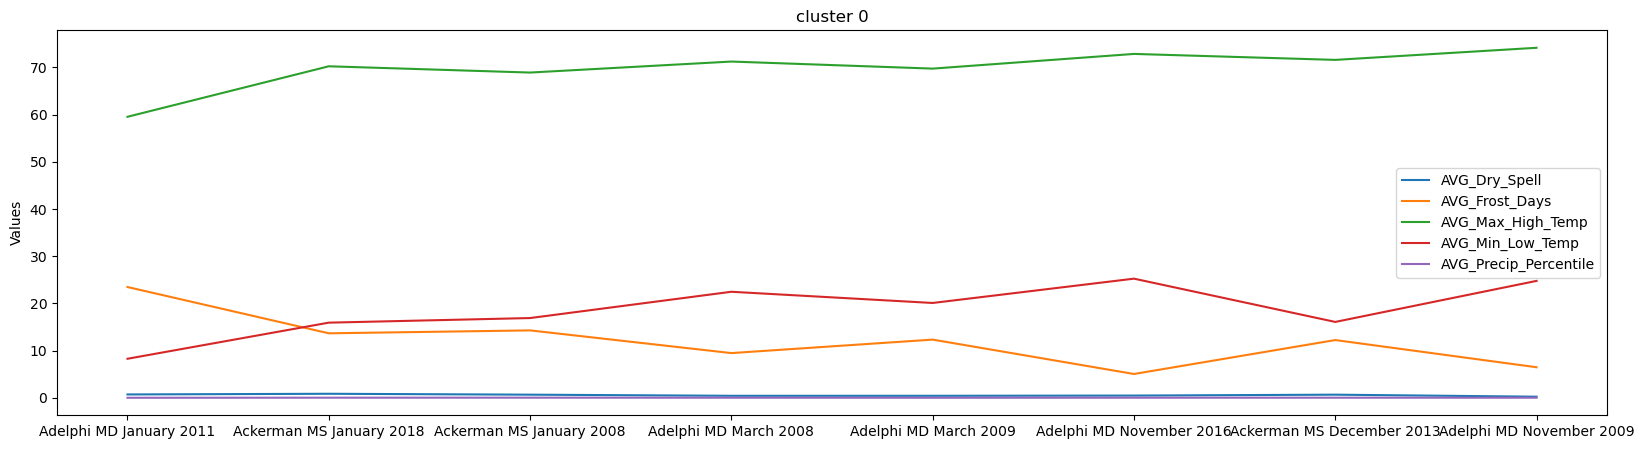

In [75]:
#graph
clust0_df.plot(kind='line',
        title='cluster 0',
        ylabel='Values',
        figsize=(20, 5),
        use_index=True,
        legend=True)


In [80]:
cluster_1 = ['Alachua FL August 2018',
             'Albany CA July 2016', 
             'Alachua FL May 2007',
             'Alachua FL May 2015', 
             'Ackerman MS August 2022', 
             'Ackerman MS September 2011',
             'Albany CA September 2012',
             'Alachua FL June 2006']


clust1_df = pd.DataFrame(df,index=cluster_1)
clust1_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Alachua FL August 2018,0.285714,0.0,100.662426,66.775006,0.065992
Albany CA July 2016,1.000000,0.0,80.997869,52.369688,0.000000
Alachua FL May 2007,0.714286,0.0,97.405134,55.328209,0.012695
Alachua FL May 2015,0.428571,0.0,95.994220,56.556564,0.034675
Ackerman MS August 2022,0.428571,0.0,99.340256,65.717980,0.037335
Ackerman MS September 2011,0.761905,0.0,95.039828,50.285254,0.029508
Albany CA September 2012,1.666667,0.0,83.752709,51.587995,0.000000
Alachua FL June 2006,0.476190,0.0,99.066503,63.693377,0.080165


<AxesSubplot:title={'center':'cluster 1'}, ylabel='Values'>

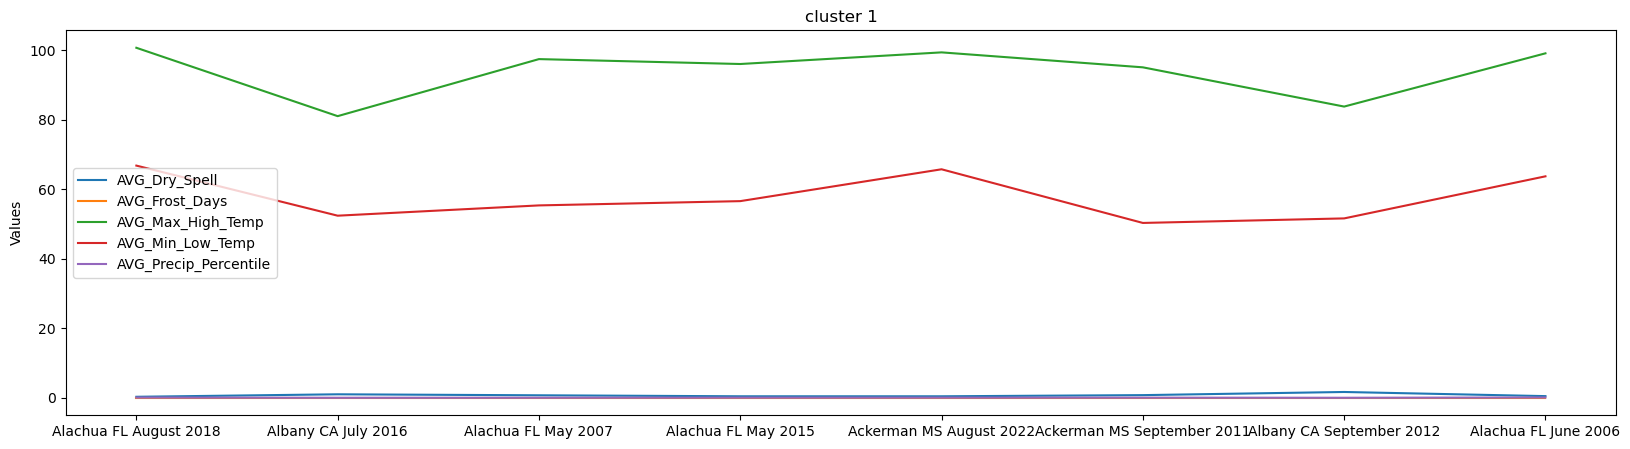

In [83]:
#graph
clust1_df.plot(kind='line',
        title='cluster 1',
        ylabel='Values',
        figsize=(20, 5),
        use_index=True,
        legend=True)


In [82]:
cluster_2 = ['Albany CA February 2015', 
             'Alachua FL March 2016',
             'Albany CA June 2008',
             'Adelphi MD October 2010',
             'Ackerman MS November 2019', 
             'Ackerman MS March 2008', 
             'Albany CA April 2009',
             'Ackerman MS November 2010']

clust2_df = pd.DataFrame(df,index=cluster_2)
clust2_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Albany CA February 2015,0.809524,0.000000,70.097664,39.222503,0.029001
Alachua FL March 2016,0.523810,0.476190,84.550879,35.803406,0.019039
Albany CA June 2008,1.666667,0.000000,80.470084,49.346046,0.000000
Adelphi MD October 2010,0.857143,0.333333,82.680528,33.812132,0.016904
Ackerman MS November 2019,0.666667,3.000000,79.118158,28.456686,0.031789
Ackerman MS March 2008,0.238095,2.761905,77.944732,28.283892,0.036915
Albany CA April 2009,0.952381,0.000000,74.171138,43.893045,0.008728
Ackerman MS November 2010,0.571429,3.380952,80.564291,26.585385,0.032913


<AxesSubplot:title={'center':'cluster 2'}, ylabel='Values'>

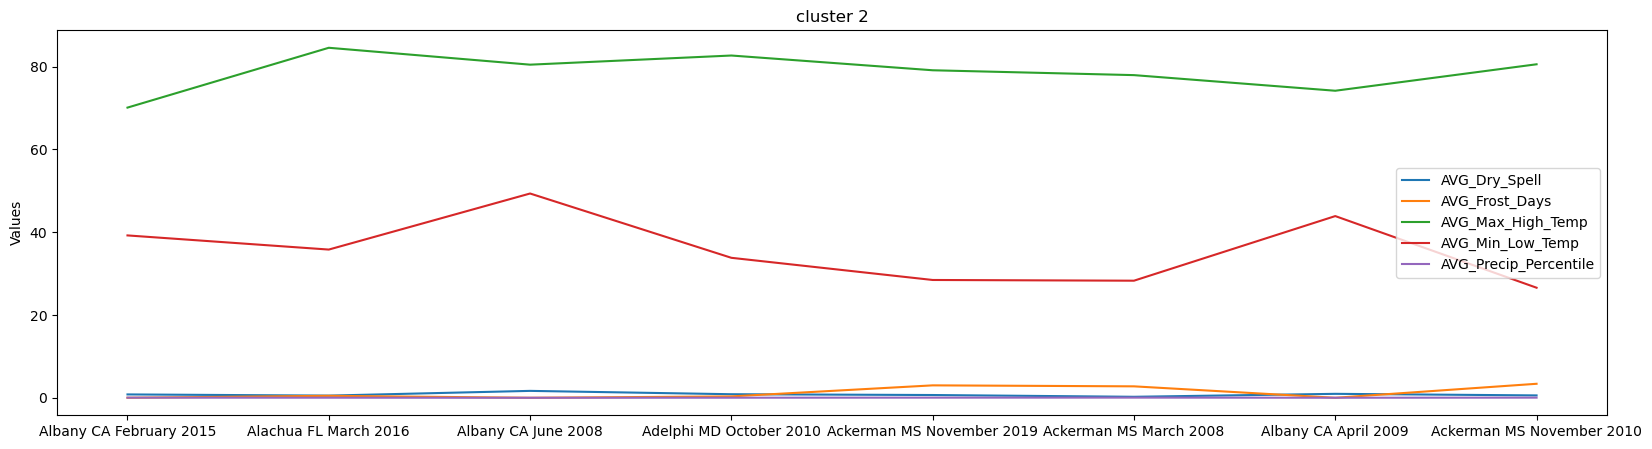

In [84]:
#graph
clust2_df.plot(kind='line',
        title='cluster 2',
        ylabel='Values',
        figsize=(20, 5),
        use_index=True,
        legend=True)
